# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell
from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Loading dataset

In [5]:
df =  pd.read_csv('./2017/nl/data/cleaned_data.csv')

The total of participant after cleaning the dataset. Remove all participants that have not completed the survey passed the first pages and all participants who are not from the country

In [6]:
len(df)

77

# Section 1. Social demographics

## Country of work

### In which country do you work?

In [7]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../survey_creation/2017/nl/listAnswers/countries.csv", "False", "./2017/nl/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which country do you work?,,
Netherlands,77,100.0


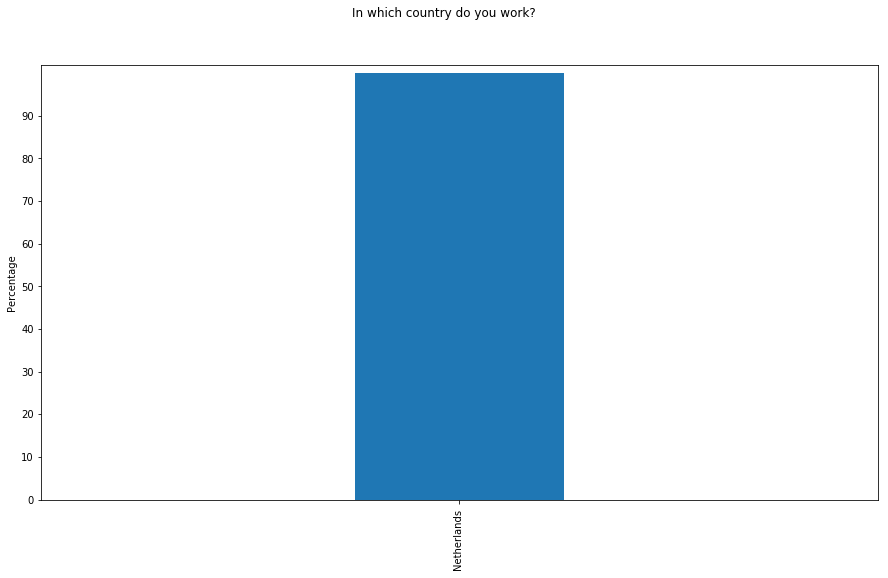

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Gender

### Please select your gender

In [11]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../survey_creation/2017/nl/listAnswers/gender.csv", "False", "./2017/nl/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your gender,,
Male,63,89.0
Female,5,7.0
Prefer not to say,3,4.0
NaN,6,NaN


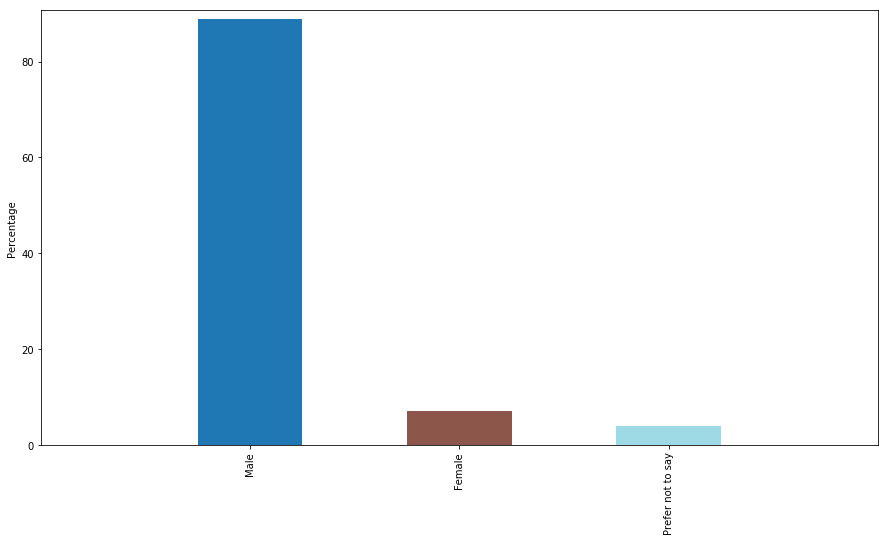

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Age

### Please select your age

In [15]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../survey_creation/2017/nl/listAnswers/age.csv", "False", "./2017/nl/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your age,,
35 to 44 years,30,42.0
25 to 34 years,30,42.0
45 to 54 years,8,11.0
55 to 64 years,3,4.0
NaN,6,NaN


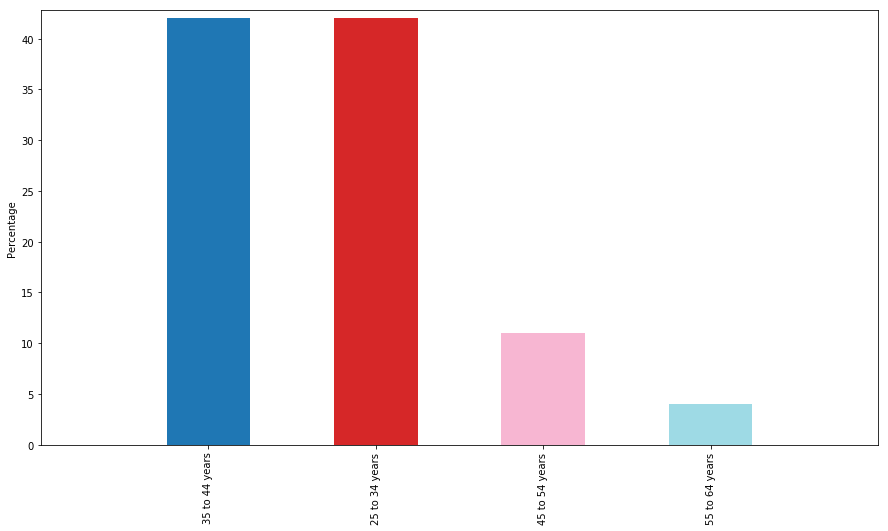

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Salary

### Please select the range of your salary

In [19]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "one choice", "./../survey_creation/2017/nl/listAnswers/salary_nl.csv", "False", "./2017/nl/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select the range of your salary,,
Between 44.000 and 49.999 EUR,13,19.0
Prefer not to say,12,17.0
Between 33.000 and 38.499 EUR,10,14.0
Between 38.500 and 43.999 EUR,10,14.0
Between 50.000 and 54.999 EUR,9,13.0
Between 55.000 and 65.999 EUR,5,7.0
Between 66.000 and 76.999 EUR,5,7.0
Less than 27.499 EUR,3,4.0
Between 27.500 and 32.999 EUR,2,3.0


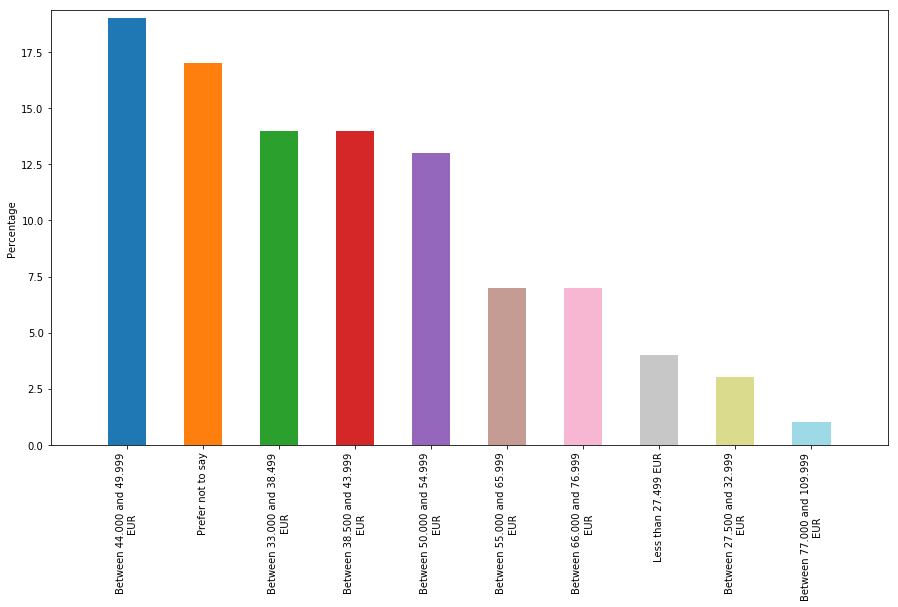

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Qualifications

### What is the highest qualification you have obtained?

In [23]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../survey_creation/2017/nl/listAnswers/education_nl.csv", "False", "./2017/nl/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What is the highest qualification you have obtained?,,
PhD,43,56.0
WO (Wetenschappelijk onderwijs) Master,29,38.0
WO (Wetenschappelijk onderwijs) Bachelor,2,3.0
HBO (Hoger beroepsonderwijs) Bachelor,2,3.0
HBO (Hoger beroepsonderwijs) Master,1,1.0


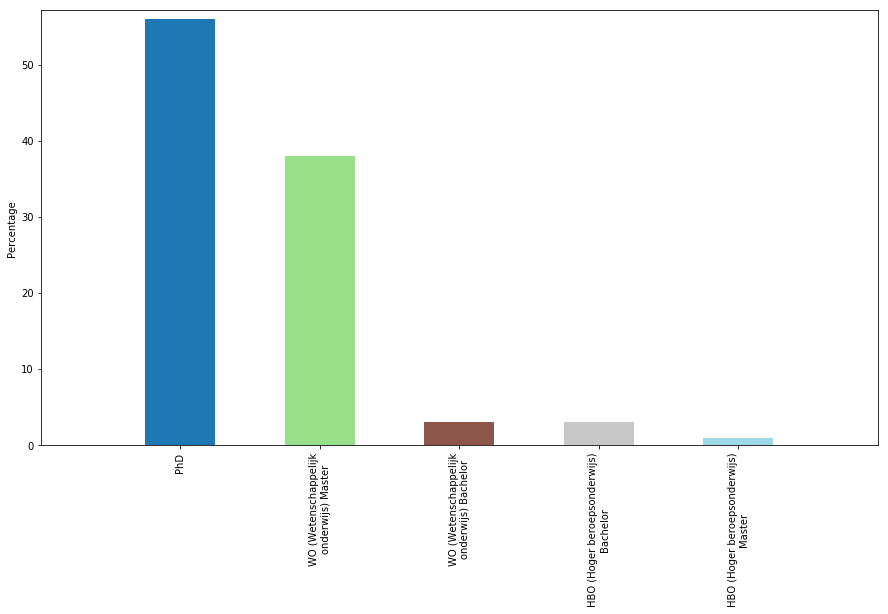

In [26]:
_ = get_plot(perc_to_count, "one choice")

### In which subject is your highest academic qualification?

In [27]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../survey_creation/2017/nl/listAnswers/academic_field.csv", "False", "./2017/nl/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which subject is your highest academic qualification?,,
Computer Science,20,26.0
Physics and Astronomy,18,23.0
Biological Sciences,9,12.0
Chemistry,7,9.0
Other,7,9.0
Geography & Environmental Sciences,4,5.0
Communication & Media Studies,3,4.0
History,2,3.0
Mathematics,2,3.0


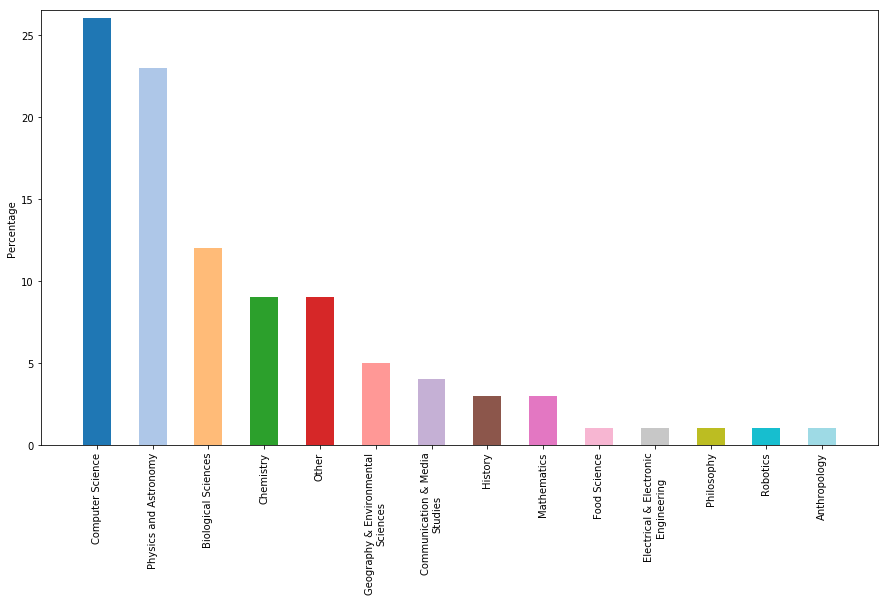

In [30]:
_ = get_plot(perc_to_count, "one choice")

# Section 2: Questions about coding

### Do you write code as part of your job?

In [31]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],Yes [Percentage],No [Percentage]
Do you write code as part of your job?,75,2,97.0,3.0


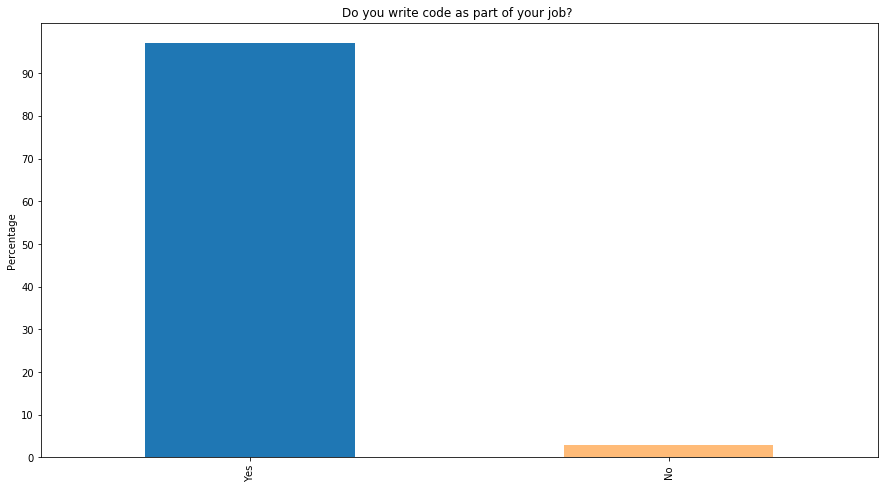

In [34]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code that you write?

In [35]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_usage_5.csv", "False", "./2017/nl/output/")

In [36]:
display(v_to_count) 

,Who uses the code that you write? []
0 - Mostly me,5
1,5
2,15
3,16
4,17
5 - Mostly other people,19


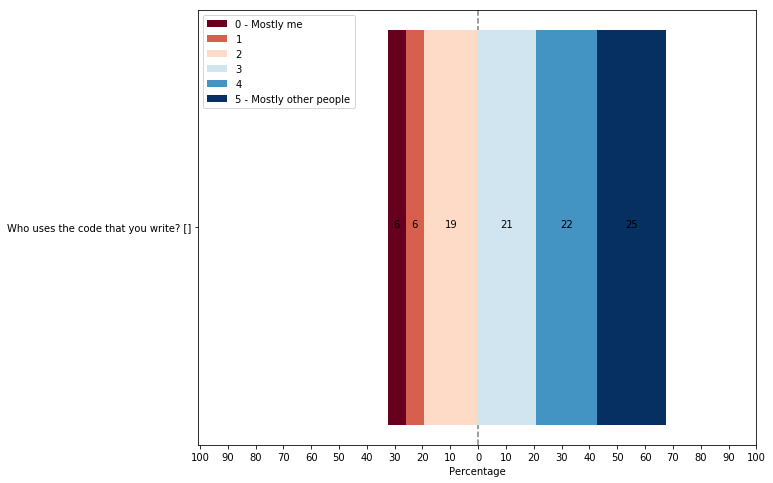

In [37]:
_ = get_plot(v_to_count, "likert")

### Do you consider yourself a professional software developer?

In [38]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [39]:
perc_to_count = get_percentage(v_to_count, filename)

In [40]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],Yes [Percentage],No [Percentage]
Do you consider yourself a professional software developer?,50,27,65.0,35.0


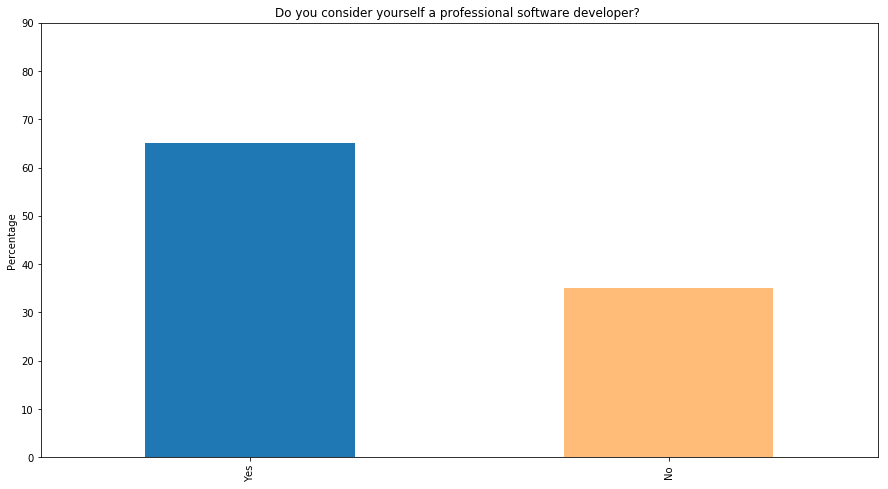

In [41]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of software development experience do you have?

In [42]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of software development experience do you have?'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       How many years of software development experience do you have?
count                                          77.000000             
mean                                           12.389610             
std                                             8.421707             
min                                             0.000000             
25%                                             6.000000             
50%                                            10.000000             
75%                                            20.000000             
max                                            35.000000             


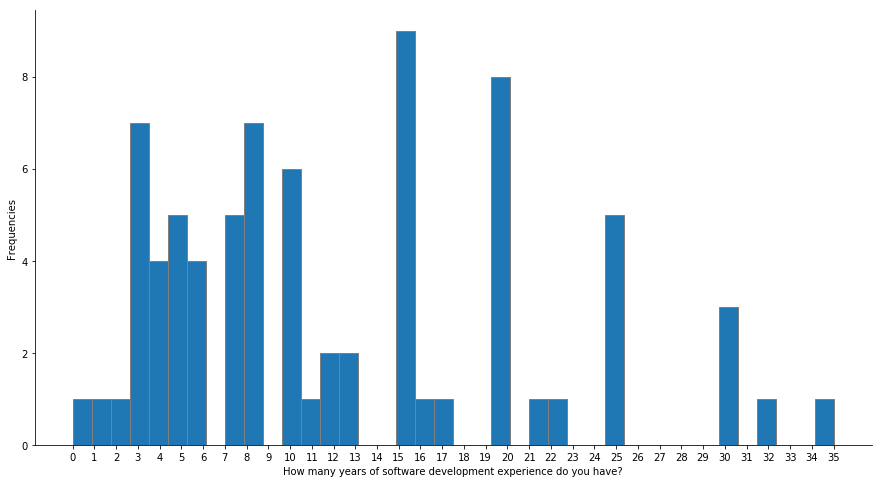

In [43]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development; In an average month, how much time do you spend on Research; In an average month, how much time do you spend on Management; In an average month, how much time do you spend on Teaching; In an average month, how much time do you spend on Other activities

In [44]:
v_to_count, filename  = get_count(df, ['likert0[time1can]. [In an average month, how much time do you spend on software development]', 'likert0[time2can]. [In an average month, how much time do you spend on Research]', 'likert0[time3can]. [In an average month, how much time do you spend on Management]', 'likert0[time4can]. [In an average month, how much time do you spend on Teaching]', 'likert0[time5can]. [In an average month, how much time do you spend on Other activities]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_10.csv", "False", "./2017/nl/output/")

In [45]:
display(v_to_count) 

,"In an average month, how much time do you spend on software development","In an average month, how much time do you spend on Research","In an average month, how much time do you spend on Management","In an average month, how much time do you spend on Teaching","In an average month, how much time do you spend on Other activities"
1 (None at all),2,8.0,18.0,46.0,11.0
2,6,25.0,27.0,26.0,36.0
3,6,14.0,15.0,1.0,20.0
4,5,11.0,8.0,1.0,7.0
5,10,8.0,NaN,2.0,1.0
6,14,3.0,4.0,1.0,1.0
7,13,5.0,1.0,NaN,NaN
8,11,3.0,3.0,NaN,1.0
9,7,NaN,NaN,NaN,NaN
10 (All my time),3,NaN,1.0,NaN,NaN


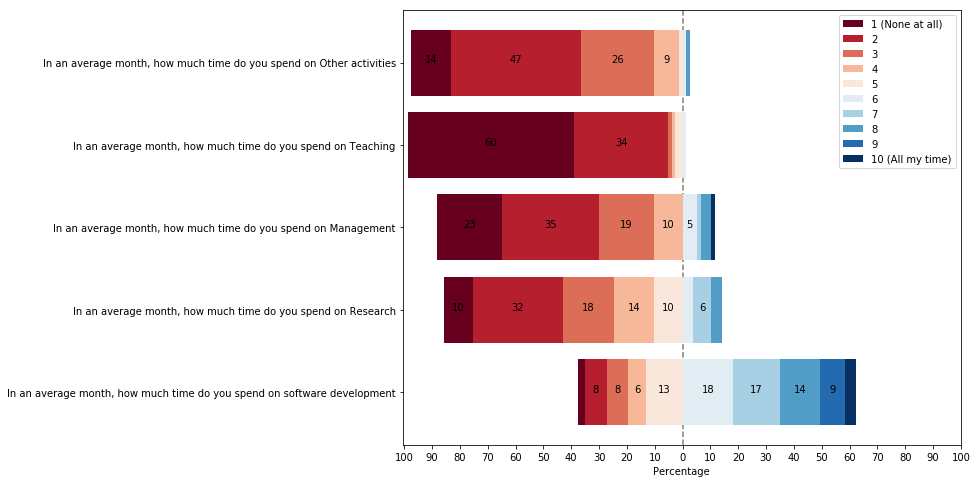

In [46]:
_ = get_plot(v_to_count, "likert")

# Section 3. Questions about employment

### What type of organisation do you work for?

In [47]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../survey_creation/2017/nl/listAnswers/type_organisation_nl.csv", "False", "./2017/nl/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What type of organisation do you work for?,,
University / University Medical Center / Applied University (HBO),37,48.0
Research Institute (Onderzoeksinstituut / Publieke Kennisorganisatie),30,39.0
Private Company,6,8.0
Other,4,5.0


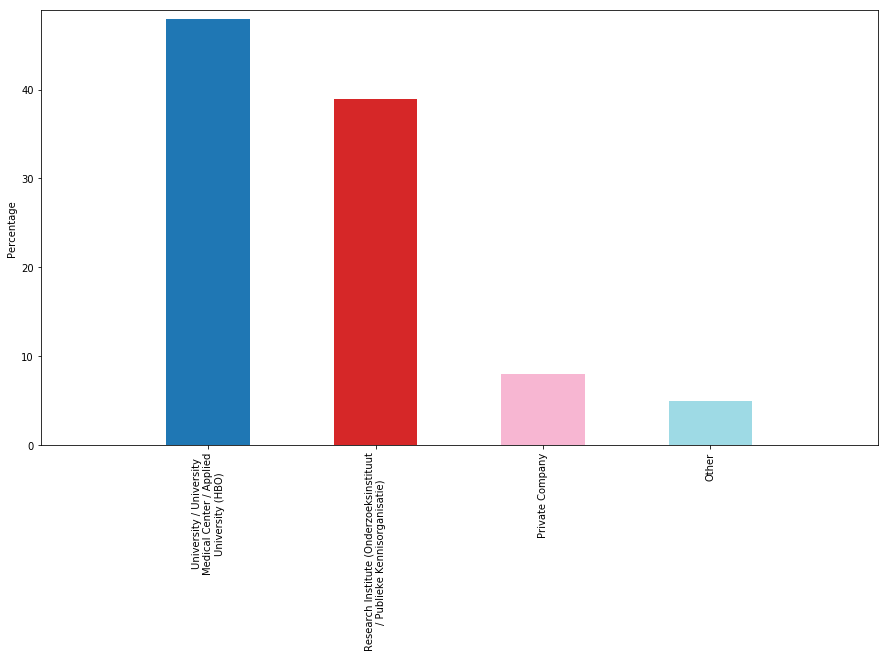

In [50]:
_ = get_plot(perc_to_count, "one choice")

### Which University / Medical Center / Applied University (HBO)?

In [51]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which University / Medical Center / Applied University (HBO)?'], "one choice", "./../survey_creation/2017/nl/listAnswers/universities_nl.csv", "False", "./2017/nl/output/")

In [52]:
perc_to_count = get_percentage(v_to_count, filename)

In [53]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which University / Medical Center / Applied University (HBO)?,,
Leiden University,7,20.0
"Radboudumc, Radboud Universitair Medisch Centrum",5,14.0
Utrecht University,4,11.0
"UMCG, Universitair Medisch Centrum Groningen",3,9.0
University of Amsterdam,3,9.0
VU University Amsterdam,3,9.0
"LUMC, Leids Universitair Medisch Centrum",2,6.0
"UMC Utrecht, Universitair Medisch Centrum Utrecht",2,6.0
Wageningen University,2,6.0


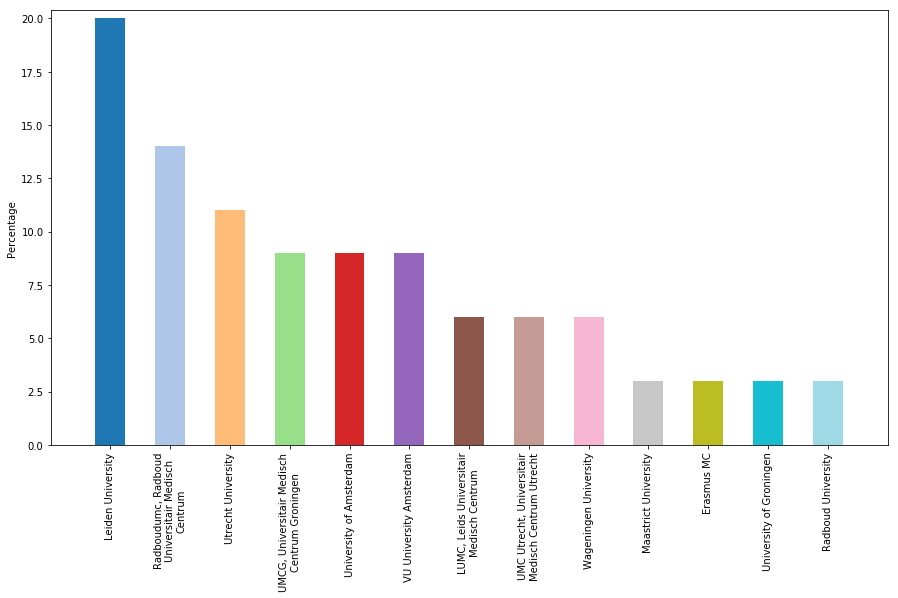

In [54]:
_ = get_plot(perc_to_count, "one choice")

### Which organisation do you work for?

In [55]:
v_to_count, filename  = get_count(df, ['currentEmp4. Which organisation do you work for?'], "one choice", "./../survey_creation/2017/nl/listAnswers/organisations_nl.csv", "False", "./2017/nl/output/")

In [56]:
perc_to_count = get_percentage(v_to_count, filename)

In [57]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which organisation do you work for?,,
Netherlands eScience Center,15,52.0
Huygens ING,2,7.0
Wageningen Research (DLO),2,7.0
ASTRON,2,7.0
AMOLF,1,3.0
RIVM,1,3.0
SRON,1,3.0
Westerdijk Fungal Biodiversity Institute,1,3.0
CWI,1,3.0


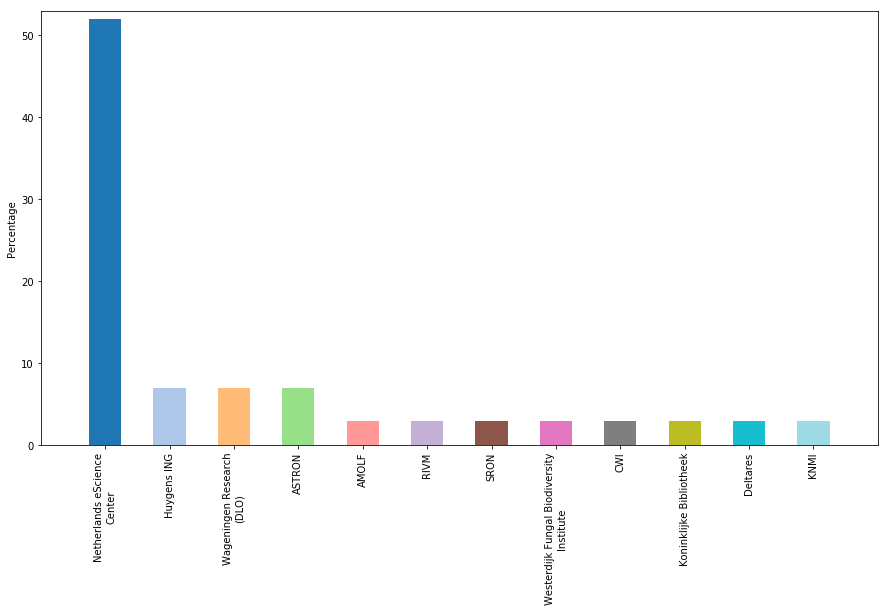

In [58]:
_ = get_plot(perc_to_count, "one choice")

### Which company do you work for?

In [59]:
 wc = wordcloud(df, ['currentEmp20. Which company do you work for?'])

(-0.5, 1499.5, 799.5, -0.5)

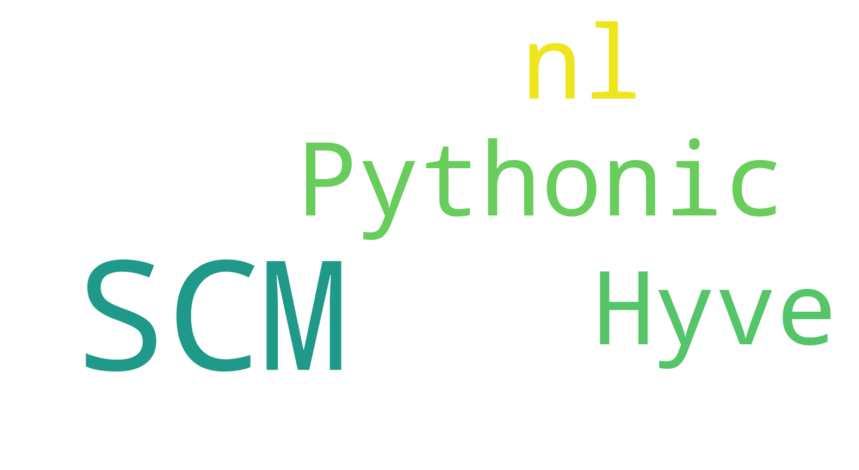

In [60]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What is your official job title?

In [61]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title?'])

(-0.5, 1499.5, 799.5, -0.5)

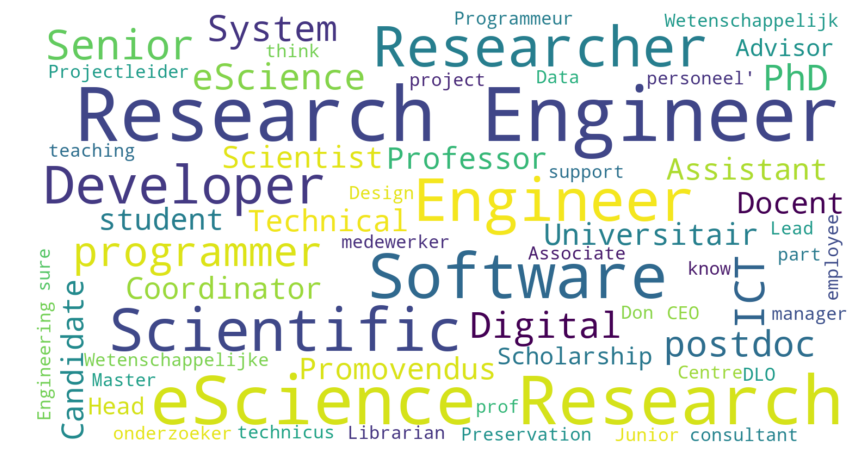

In [62]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known by a different job title? If so, please enter the job title you use

In [63]:
 wc = wordcloud(df, ['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

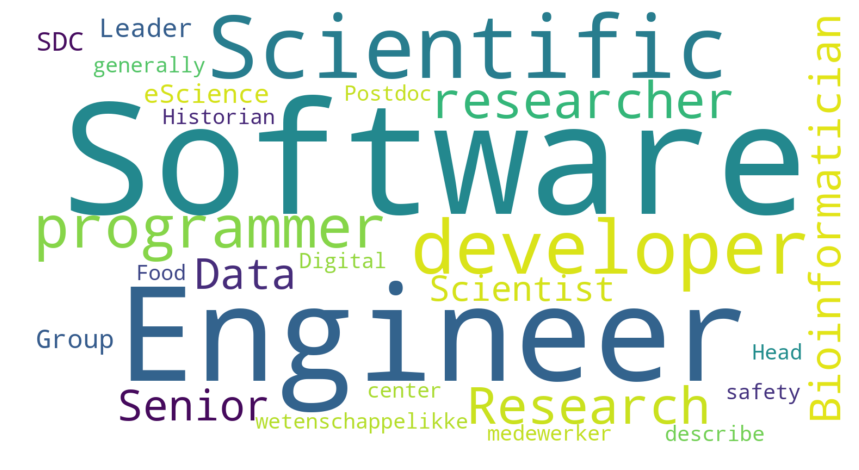

In [64]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 4. Questions about the type of contract


### Do you work full time (36 hours or more) or part time?

In [65]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time (36 hours or more) or part time?'], "one choice", "./../survey_creation/2017/nl/listAnswers/type_hours.csv", "False", "./2017/nl/output/")

In [66]:
perc_to_count = get_percentage(v_to_count, filename)

In [67]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Do you work full time (36 hours or more) or part time?,,
Full time,57,74.0
Part time,20,26.0


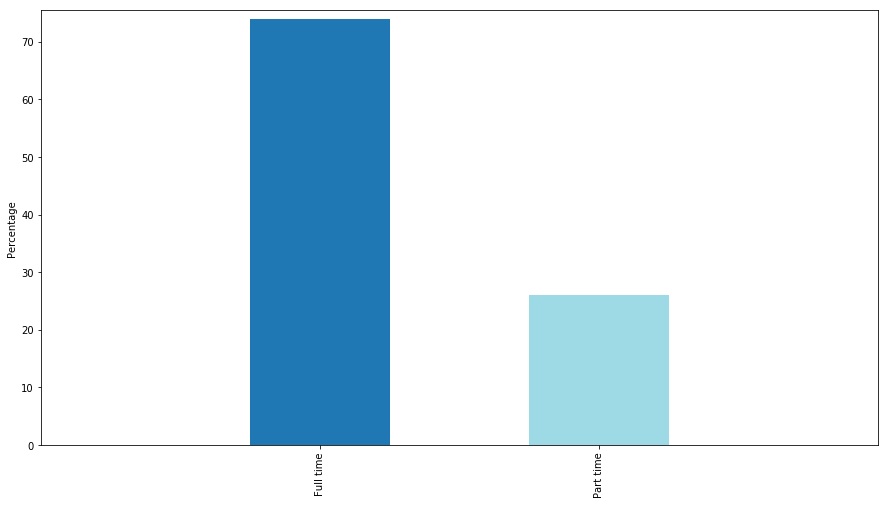

In [68]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [69]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../survey_creation/2017/nl/listAnswers/type_contract_nl.csv", "False", "./2017/nl/output/")

In [70]:
perc_to_count = get_percentage(v_to_count, filename)

In [71]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What type of contract are you employed on?,,
Permanent,50,65.0
Fixed term,26,34.0
Other,1,1.0


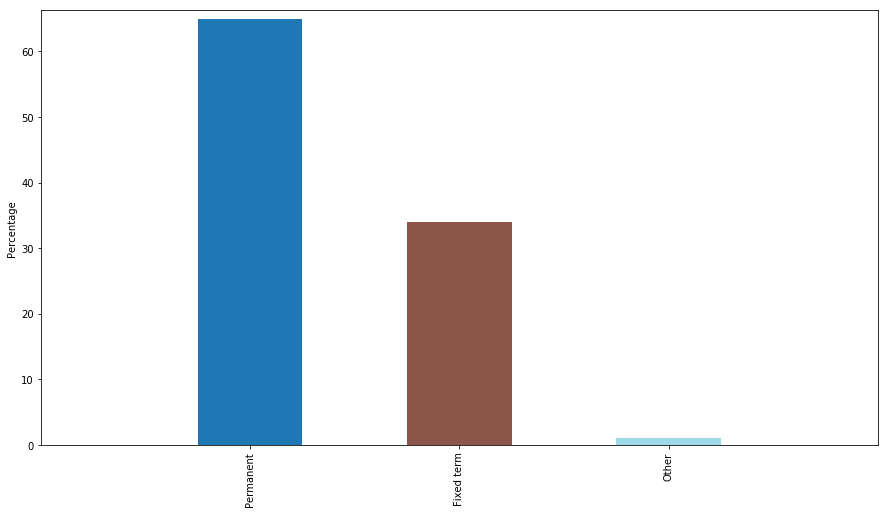

In [72]:
_ = get_plot(perc_to_count, "one choice")

### What is the duration of your current contract?

In [73]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the duration of your current contract? (in years)'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       What is the duration of your current contract? (in years)
count                                          26.000000        
mean                                            2.284615        
std                                             1.047928        
min                                             0.400000        
25%                                             2.000000        
50%                                             2.000000        
75%                                             3.000000        
max                                             4.000000        


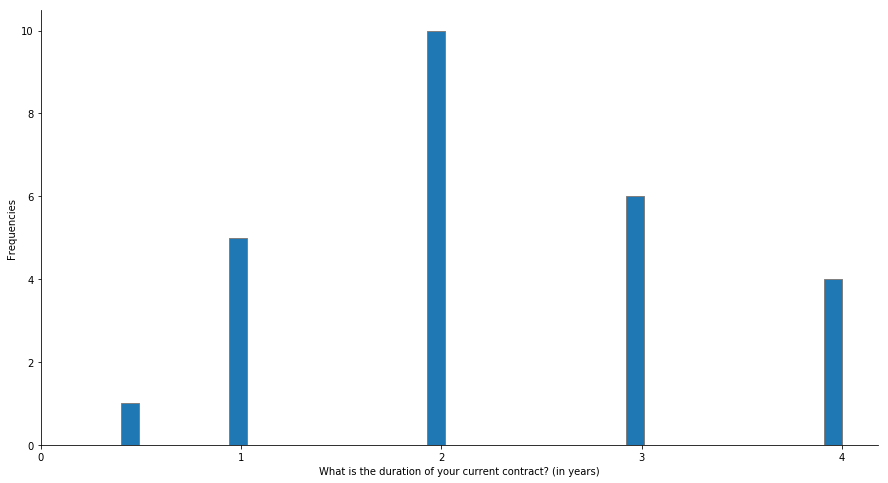

In [74]:
_ = get_plot(v_to_count, "freenumeric")

### In which disciplines do you work (select as many as apply)

In [75]:
v_to_count, filename  = get_count(df, ['currentEmp13[1]. In which disciplines do you work (select as many as apply) [Accounting & Finance]', 'currentEmp13[2]. In which disciplines do you work (select as many as apply) [Aeronautical & Manufacturing Engineering]', 'currentEmp13[3]. In which disciplines do you work (select as many as apply) [Agriculture & Forestry]', 'currentEmp13[4]. In which disciplines do you work (select as many as apply) [American Studies]', 'currentEmp13[5]. In which disciplines do you work (select as many as apply) [Anatomy & Physiology]', 'currentEmp13[6]. In which disciplines do you work (select as many as apply) [Anthropology]', 'currentEmp13[7]. In which disciplines do you work (select as many as apply) [Architecture]', 'currentEmp13[8]. In which disciplines do you work (select as many as apply) [Art & Design]', 'currentEmp13[9]. In which disciplines do you work (select as many as apply) [Biological Sciences]', 'currentEmp13[10]. In which disciplines do you work (select as many as apply) [Business & Management Studies]', 'currentEmp13[11]. In which disciplines do you work (select as many as apply) [Chemical Engineering]', 'currentEmp13[12]. In which disciplines do you work (select as many as apply) [Chemistry]', 'currentEmp13[13]. In which disciplines do you work (select as many as apply) [Civil Engineering]', 'currentEmp13[14]. In which disciplines do you work (select as many as apply) [Classics & Ancient History]', 'currentEmp13[15]. In which disciplines do you work (select as many as apply) [Communication & Media Studies]', 'currentEmp13[16]. In which disciplines do you work (select as many as apply) [Complementary Medicine]', 'currentEmp13[17]. In which disciplines do you work (select as many as apply) [Computer Science]', 'currentEmp13[18]. In which disciplines do you work (select as many as apply) [Counselling]', 'currentEmp13[19]. In which disciplines do you work (select as many as apply) [Criminology]', 'currentEmp13[20]. In which disciplines do you work (select as many as apply) [Dentistry]', 'currentEmp13[21]. In which disciplines do you work (select as many as apply) [East & South Asian Studies]', 'currentEmp13[22]. In which disciplines do you work (select as many as apply) [Economics]', 'currentEmp13[23]. In which disciplines do you work (select as many as apply) [Education]', 'currentEmp13[24]. In which disciplines do you work (select as many as apply) [Electrical & Electronic Engineering]', 'currentEmp13[25]. In which disciplines do you work (select as many as apply) [English]', 'currentEmp13[26]. In which disciplines do you work (select as many as apply) [Fashion]', 'currentEmp13[27]. In which disciplines do you work (select as many as apply) [Food Science]', 'currentEmp13[28]. In which disciplines do you work (select as many as apply) [French]', 'currentEmp13[29]. In which disciplines do you work (select as many as apply) [Geography & Environmental Sciences]', 'currentEmp13[30]. In which disciplines do you work (select as many as apply) [Geology]', 'currentEmp13[31]. In which disciplines do you work (select as many as apply) [General Engineering]', 'currentEmp13[32]. In which disciplines do you work (select as many as apply) [German]', 'currentEmp13[33]. In which disciplines do you work (select as many as apply) [History]', 'currentEmp13[34]. In which disciplines do you work (select as many as apply) [History of Art, Architecture & Design]', 'currentEmp13[35]. In which disciplines do you work (select as many as apply) [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[36]. In which disciplines do you work (select as many as apply) [Iberian Languages/Hispanic Studies]', 'currentEmp13[37]. In which disciplines do you work (select as many as apply) [Land & Property Management]', 'currentEmp13[38]. In which disciplines do you work (select as many as apply) [Law]', 'currentEmp13[39]. In which disciplines do you work (select as many as apply) [Librarianship & Information Management]', 'currentEmp13[40]. In which disciplines do you work (select as many as apply) [Linguistics]', 'currentEmp13[41]. In which disciplines do you work (select as many as apply) [Marketing]', 'currentEmp13[42]. In which disciplines do you work (select as many as apply) [Materials Technology]', 'currentEmp13[43]. In which disciplines do you work (select as many as apply) [Mathematics]', 'currentEmp13[44]. In which disciplines do you work (select as many as apply) [Mechanical Engineering]', 'currentEmp13[45]. In which disciplines do you work (select as many as apply) [Medicine]', 'currentEmp13[46]. In which disciplines do you work (select as many as apply) [Middle Eastern and African Studies]', 'currentEmp13[47]. In which disciplines do you work (select as many as apply) [Music]', 'currentEmp13[48]. In which disciplines do you work (select as many as apply) [Nursing]', 'currentEmp13[49]. In which disciplines do you work (select as many as apply) [Ophthalmics]', 'currentEmp13[50]. In which disciplines do you work (select as many as apply) [Pharmacology & Pharmacy]', 'currentEmp13[51]. In which disciplines do you work (select as many as apply) [Philosophy]', 'currentEmp13[52]. In which disciplines do you work (select as many as apply) [Physics and Astronomy]', 'currentEmp13[53]. In which disciplines do you work (select as many as apply) [Physiotherapy]', 'currentEmp13[54]. In which disciplines do you work (select as many as apply) [Politics]', 'currentEmp13[55]. In which disciplines do you work (select as many as apply) [Psychology]', 'currentEmp13[56]. In which disciplines do you work (select as many as apply) [Robotics]', 'currentEmp13[57]. In which disciplines do you work (select as many as apply) [Russian & East European Languages]', 'currentEmp13[58]. In which disciplines do you work (select as many as apply) [Social Policy]', 'currentEmp13[59]. In which disciplines do you work (select as many as apply) [Social Work]', 'currentEmp13[60]. In which disciplines do you work (select as many as apply) [Sociology]', 'currentEmp13[61]. In which disciplines do you work (select as many as apply) [Sports Science]', 'currentEmp13[62]. In which disciplines do you work (select as many as apply) [Theology & Religious Studies]', 'currentEmp13[63]. In which disciplines do you work (select as many as apply) [Town & Country Planning and Landscape Design]', 'currentEmp13[64]. In which disciplines do you work (select as many as apply) [Veterinary Medicine]', 'currentEmp13[65]. In which disciplines do you work (select as many as apply) [Youth Work]'], "multiple choices", "./../survey_creation/2017/nl/listAnswers/academic_field.csv", "False", "./2017/nl/output/")

In [76]:
perc_to_count = get_percentage(v_to_count, filename)

In [77]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
,,
Computer Science,41,20.0
Biological Sciences,22,11.0
Physics and Astronomy,20,10.0
Medicine,12,6.0
Linguistics,11,5.0
Chemistry,11,5.0
History,10,5.0
Geography & Environmental Sciences,10,5.0
Librarianship & Information Management,6,3.0


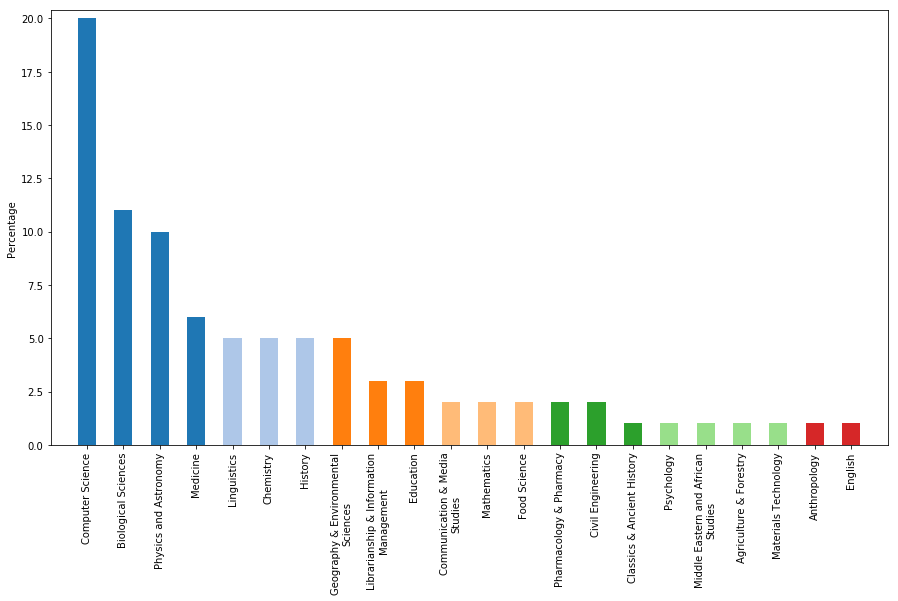

In [78]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 5. Collaboration and training

## Collaboration

### How many software projects are you currently involved in?

In [79]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved in?'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       How many software projects are you currently involved in?
count                                           75.00000        
mean                                             4.40000        
std                                              6.72229        
min                                              1.00000        
25%                                              2.00000        
50%                                              3.00000        
75%                                              4.00000        
max                                             50.00000        


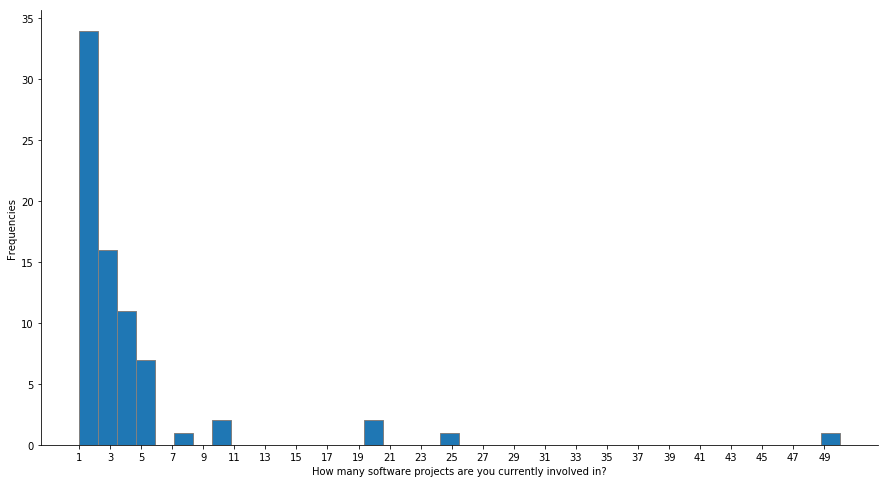

In [80]:
_ = get_plot(v_to_count, "freenumeric")

## Training

### Have you ever trained researchers in computational techniques?

In [81]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [82]:
perc_to_count = get_percentage(v_to_count, filename)

In [83]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever trained researchers in computational techniques?,44,31,2,59.0,41.0


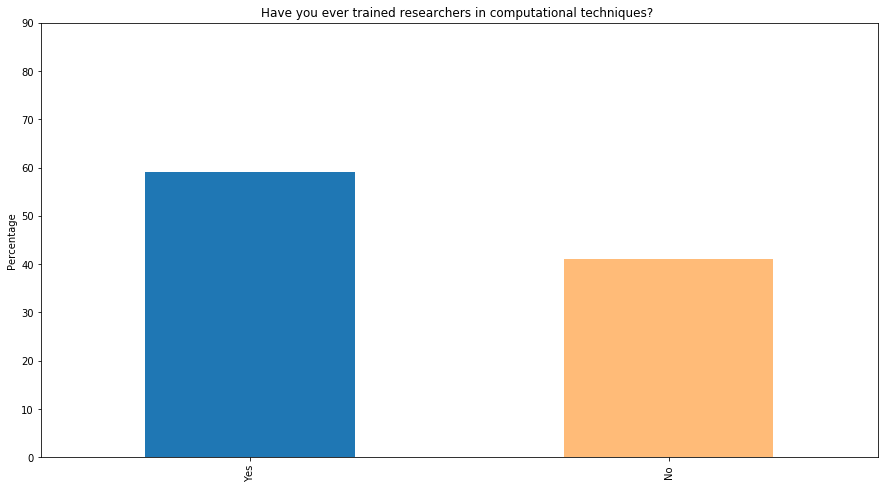

In [84]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [85]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       On average, how many times a year do you take part in providing training?
count                                          44.000000                        
mean                                            2.822727                        
std                                             4.073332                        
min                                             0.000000                        
25%                                             1.000000                        
50%                                             2.000000                        
75%                                             3.000000                        
max                                            25.000000                        


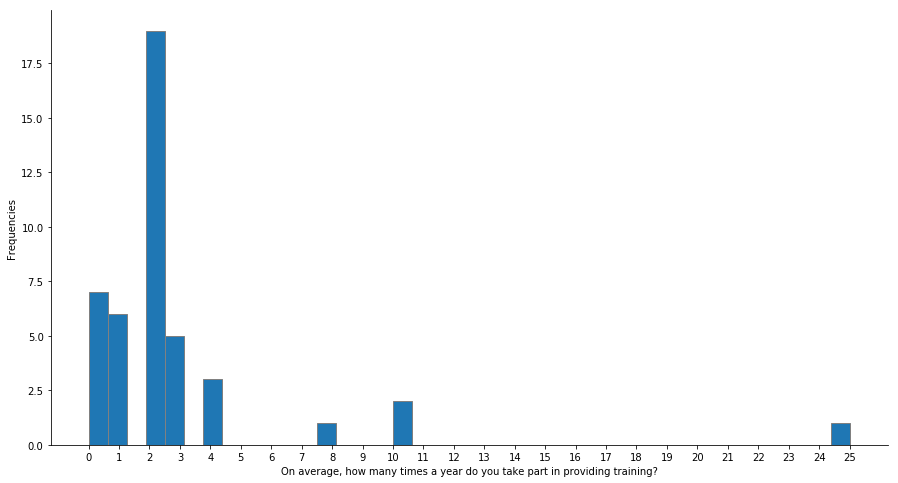

In [86]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)

In [87]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)'])

(-0.5, 1499.5, 799.5, -0.5)

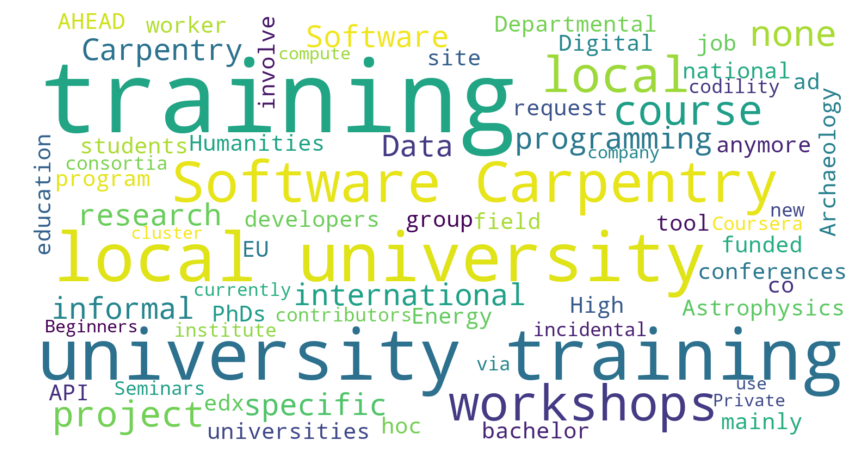

In [88]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 6. Publications

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [89]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [90]:
perc_to_count = get_percentage(v_to_count, filename)

In [91]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
paper1. Has your software contributed to research that has been published in a journal or at a conference?,71,4,2,95.0,5.0
"paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?",58,17,2,77.0,23.0
paper3. Are you generally named as the main author of the paper?,19,39,19,33.0,67.0
paper4. Are you generally named as a co-author of the paper?,35,4,38,90.0,10.0
paper5. Are you generally acknowledged in the main text of the paper?,2,2,73,50.0,50.0


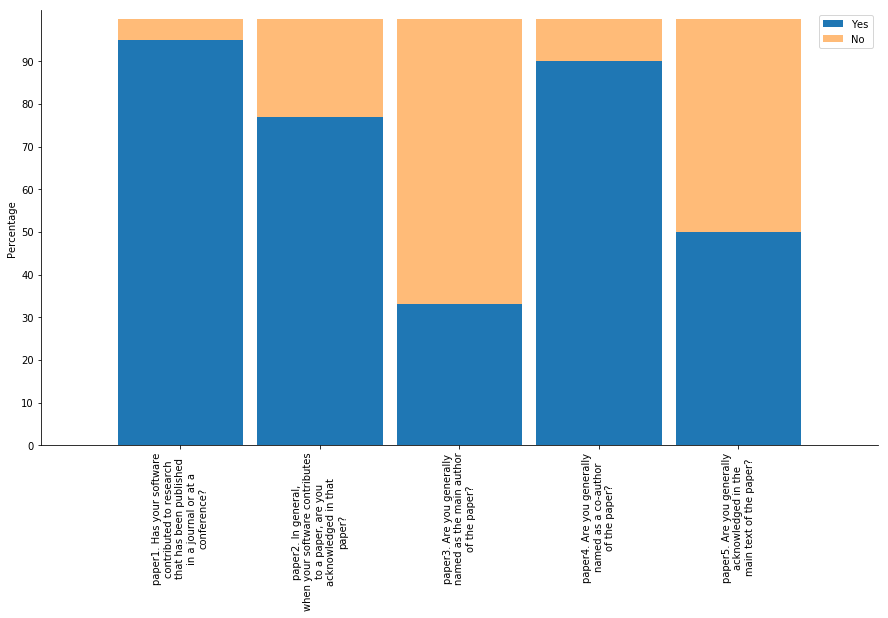

In [92]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [93]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [94]:
perc_to_count = get_percentage(v_to_count, filename)

In [95]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever presented your software work at a conference or workshop?,59,16,2,79.0,21.0


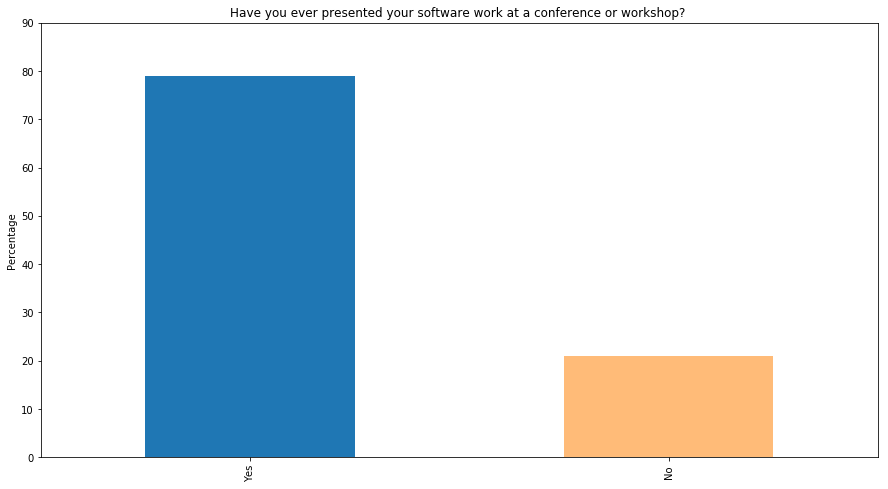

In [96]:
_ = get_plot(perc_to_count, "y/n/na")

## Open source

### Have you ever released your software under an open-source licence?

In [97]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [98]:
perc_to_count = get_percentage(v_to_count, filename)

In [99]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever released your software under an open-source licence?,64,11,2,85.0,15.0


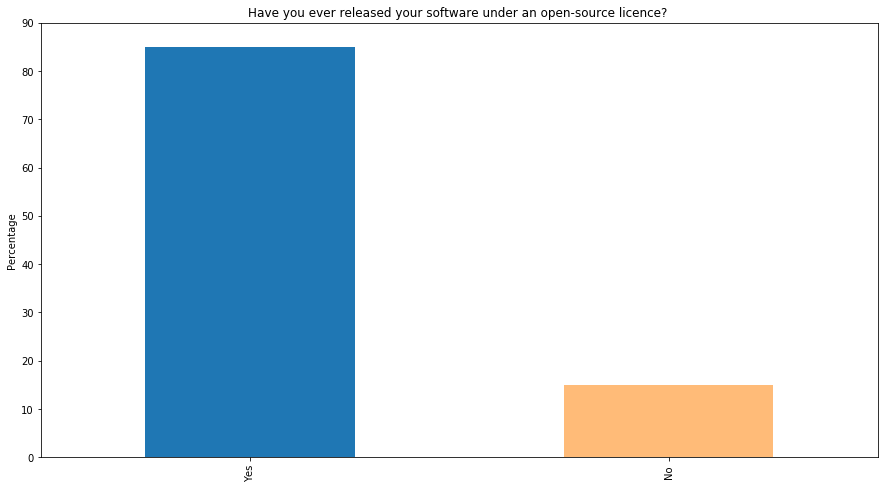

In [100]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [101]:
v_to_count, filename  = get_count(df, ["open1can[SQ001]. How often do you release the software projects you've worked on under an open-source licence? []"], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_10.csv", "False", "./2017/nl/output/")

In [102]:
display(v_to_count) 

,How often do you release the software projects you've worked on under an open-source licence? []
1 (None at all),NaN
2,6.0
3,3.0
4,3.0
5,1.0
6,1.0
7,6.0
8,6.0
9,10.0
10 (All my time),28.0


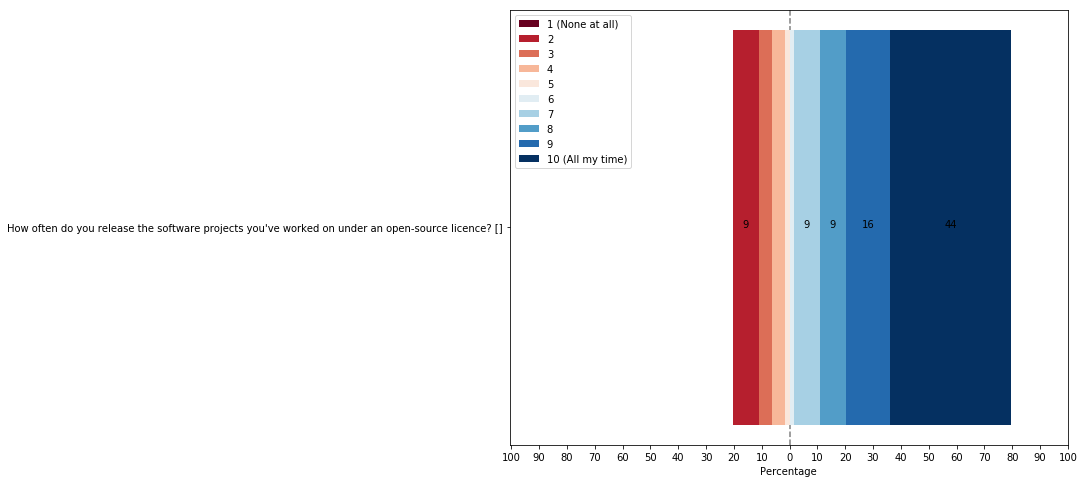

In [103]:
_ = get_plot(v_to_count, "likert")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [104]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [105]:
perc_to_count = get_percentage(v_to_count, filename)

In [106]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever used a Digital Object Identifier (DOI) to identify your software?,23,52,2,31.0,69.0


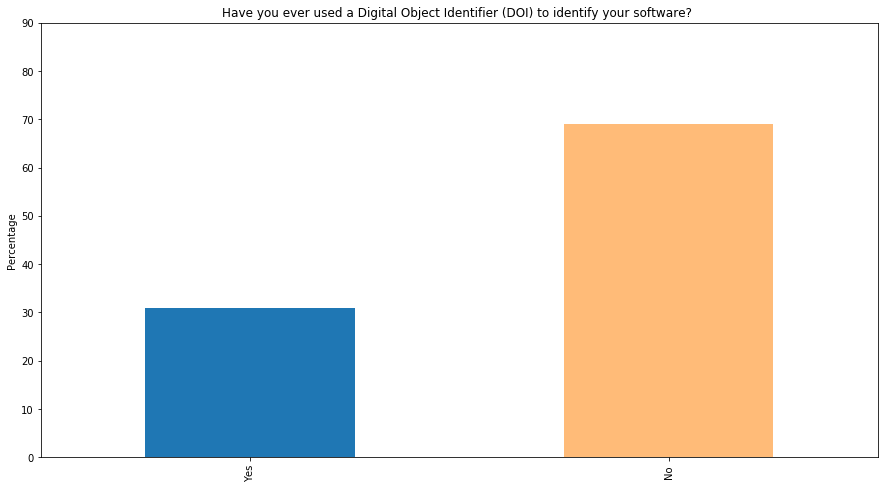

In [107]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [108]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_10.csv", "False", "./2017/nl/output/")

In [109]:
display(v_to_count) 

,How often do you associate your software with a Digital Object Identifier (DOI)? []
1 (None at all),1.0
2,4.0
3,4.0
4,1.0
5,2.0
6,2.0
7,3.0
8,5.0
9,NaN
10 (All my time),1.0


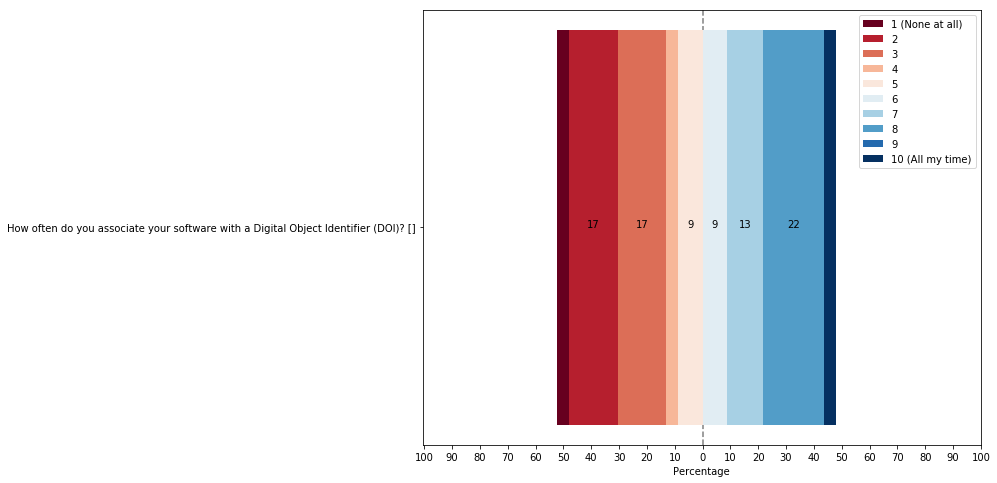

In [110]:
_ = get_plot(v_to_count, "likert")

## Section 7. Sustainability

## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [111]:
v_to_count, filename  = get_count(df, ['proj4can[1]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[2]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[3]. In general, what sort of testing do you conduct on your software? (check all that apply) [test engineers conduct testing]', 'proj4can[4]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../survey_creation/2017/nl/listAnswers/testing.csv", "False", "./2017/nl/output/")

In [112]:
perc_to_count = get_percentage(v_to_count, filename)

In [113]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
,,
Developers conduct testing,65,49.0
Users conduct testing,43,32.0
No formal testing,17,13.0
test engineers conduct testing,8,6.0


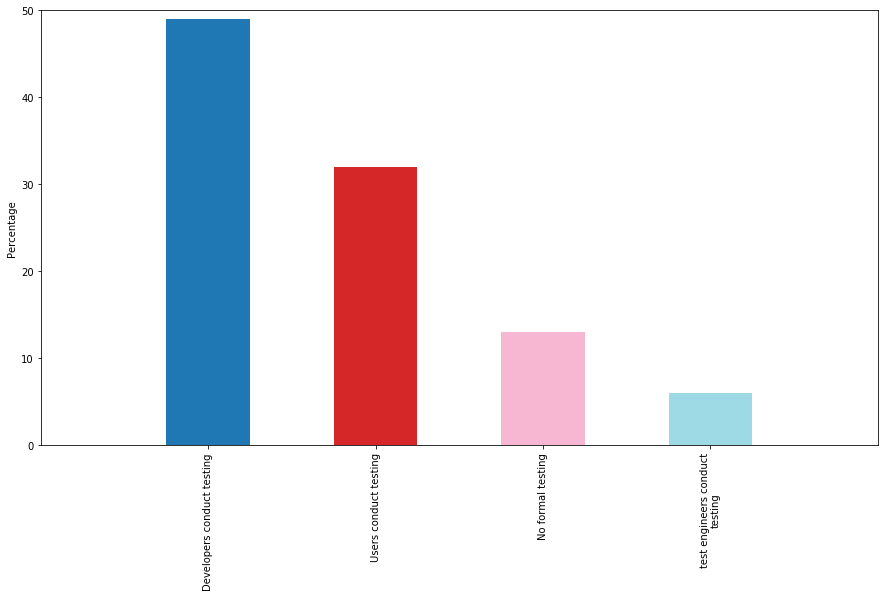

In [114]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project? (the bus factor is the number of team members who if run over by a bus would put the project in jeopardy so 1 means the project is dependent on a single person)

In [115]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project? (the bus factor is the number of team members who if run over by a bus would put the project in jeopardy so 1 means the project is dependent on a single person)'], "one choice", "./../survey_creation/2017/nl/listAnswers/bus_factor.csv", "False", "./2017/nl/output/")

In [116]:
perc_to_count = get_percentage(v_to_count, filename)

In [117]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What is the bus factor of your most important software project? (the bus factor is the number of team members who if run over by a bus would put the project in jeopardy so 1 means the project is dependent on a single person),,
1,34,45.0
2,20,27.0
3,14,19.0
5+,5,7.0
4,2,3.0
NaN,2,NaN


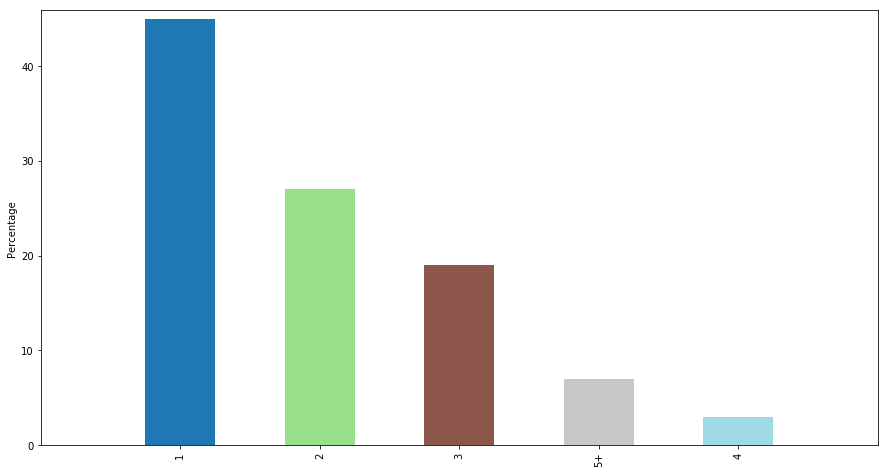

In [118]:
_ = get_plot(perc_to_count, "one choice")

### Is there a technical hand-over plan for your most important software project?

In [119]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical hand-over plan for your most important software project?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [120]:
perc_to_count = get_percentage(v_to_count, filename)

In [121]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Is there a technical hand-over plan for your most important software project?,16,59,2,21.0,79.0


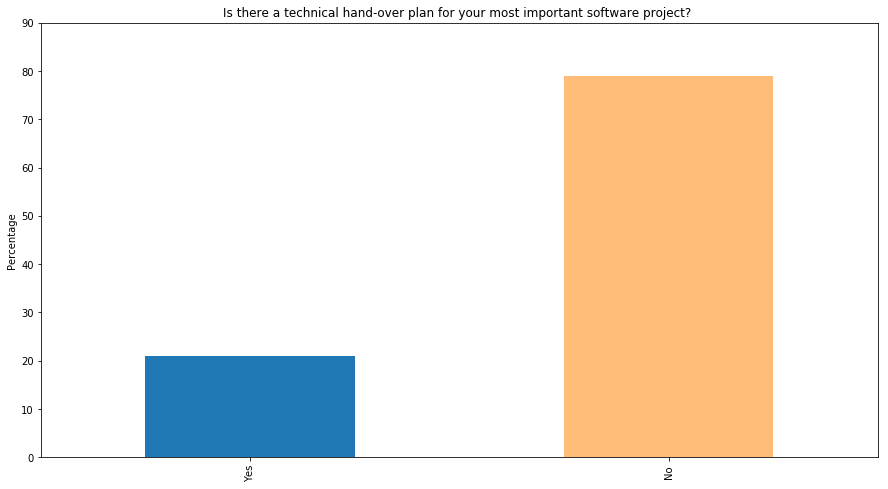

In [122]:
_ = get_plot(perc_to_count, "y/n/na")

# Section 8. Job satisfaction

## General satisfaction

### In general, how satisfied are you with [Your current position]; In general, how satisfied are you with [Your career]

In [123]:
v_to_count, filename  = get_count(df, ['likert5[satisgen1]. [In general, how satisfied are you with [Your current position]]', 'likert5[satisgen2]. [In general, how satisfied are you with [Your career]]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_satisfied_10.csv", "False", "./2017/nl/output/")

In [124]:
display(v_to_count) 

,"In general, how satisfied are you with","In general, how satisfied are you with"
0 - Not at all satisfied,2.0,2.0
1,NaN,NaN
2,1.0,2.0
3,1.0,1.0
4,2.0,3.0
5,3.0,2.0
6,4.0,5.0
7,18.0,22.0
8,30.0,23.0
9,10.0,10.0


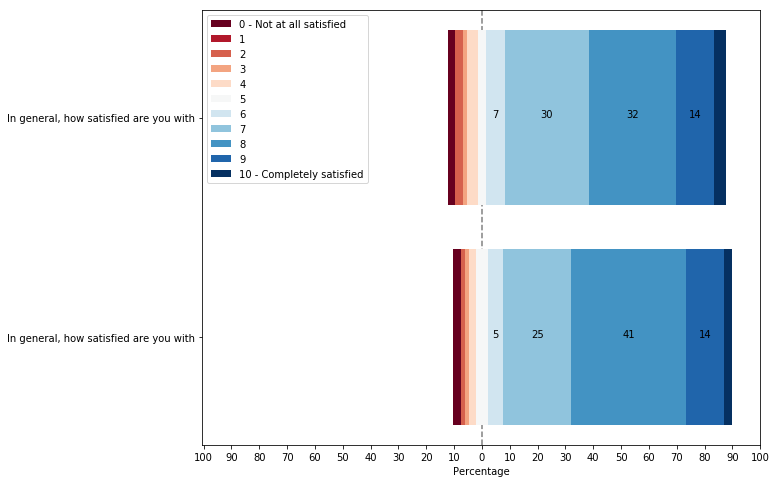

In [125]:
_ = get_plot(v_to_count, "likert")

## Feedback about performance

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [126]:
v_to_count, filename  = get_count(df, ['likert1[perfCheck1]. [Do you receive sufficient information on the results of your work?]', 'likert1[perfCheck2]. [Does your work give you the opportunity to check on how well you are doing your work?]', 'likert1[perfCheck3]. [In your work, do you have access to sufficient data and information?]', 'likert1[perfCheck4]. [Do you receive sufficient information on the purpose of your work?]', 'likert1[perfCheck5]. [Does your work provide you with direct feedback on how well you are doing your work?]', 'likert1[perfCheck6]. [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likert1[perfCheck7]. [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_5.csv", "False", "./2017/nl/output/")

In [127]:
display(v_to_count) 

,Do you receive sufficient information on the results of your work?,Does your work give you the opportunity to check on how well you are doing your work?,"In your work, do you have access to sufficient data and information?",Do you receive sufficient information on the purpose of your work?,Does your work provide you with direct feedback on how well you are doing your work?,Does your supervisor/line manager inform you about how well you are doing your work?,Do your colleagues inform you about how well you are doing your work?
Never,2,8,1,NaN,4,7,3
Sometimes,28,23,9,8.0,31,26,29
Often,24,26,24,18.0,21,21,27
Very Often,14,12,31,30.0,12,14,8
Always,5,4,8,17.0,5,5,6


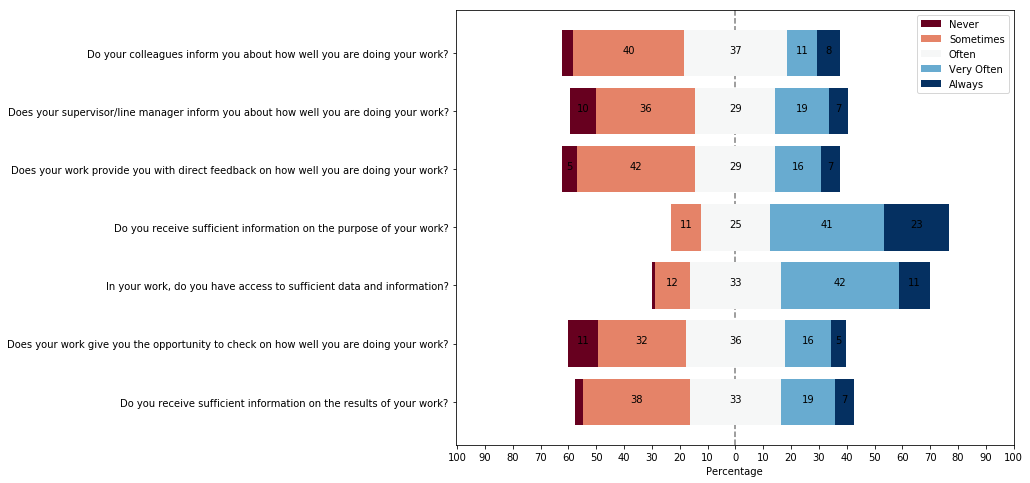

In [128]:
_ = get_plot(v_to_count, "likert")

## Turnover intention

### How often do you look forward to another day at work?; How often do you dream about getting another job that will better suit your needs?

In [129]:
v_to_count, filename  = get_count(df, ['likert3[turnOver2]. [How often do you look forward to another day at work?]', 'likert3[turnOver4]. [How often do you dream about getting another job that will better suit your needs?]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_5.csv", "False", "./2017/nl/output/")

In [130]:
display(v_to_count) 

,How often do you look forward to another day at work?,How often do you dream about getting another job that will better suit your needs?
Never,8.0,16
Sometimes,35.0,36
Often,30.0,10
Very Often,NaN,7
Always,NaN,4


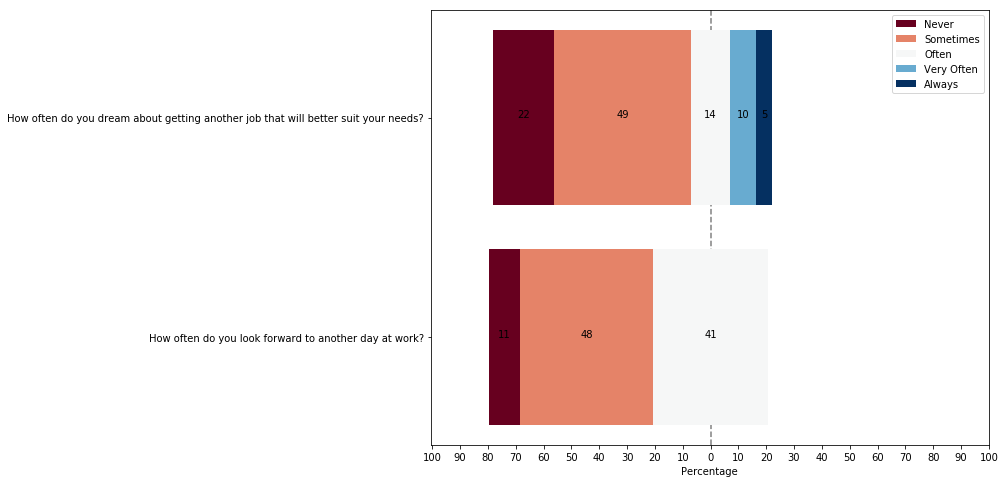

In [131]:
_ = get_plot(v_to_count, "likert")

## Perceived Employability

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [132]:
v_to_count, filename  = get_count(df, ['likert4[percEmp1]. [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likert4[percEmp2]. [I can think of a number of organisations that would probably offer me a job]', 'likert4[percEmp3]. [My experience is in demand on the labour market]', 'likert4[percEmp4]. [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [133]:
display(v_to_count) 

,It would not be very difficult for me to get an equivalent job in a different organisation,I can think of a number of organisations that would probably offer me a job,My experience is in demand on the labour market,"Given my qualifications and experience, getting a new job would not be very hard at all"
Strongly disagree,3,1,1,1
Disagree,14,3,4,4
Neither agree or disagree,23,24,10,14
Agree,26,35,40,37
Strongly Agree,7,10,18,17


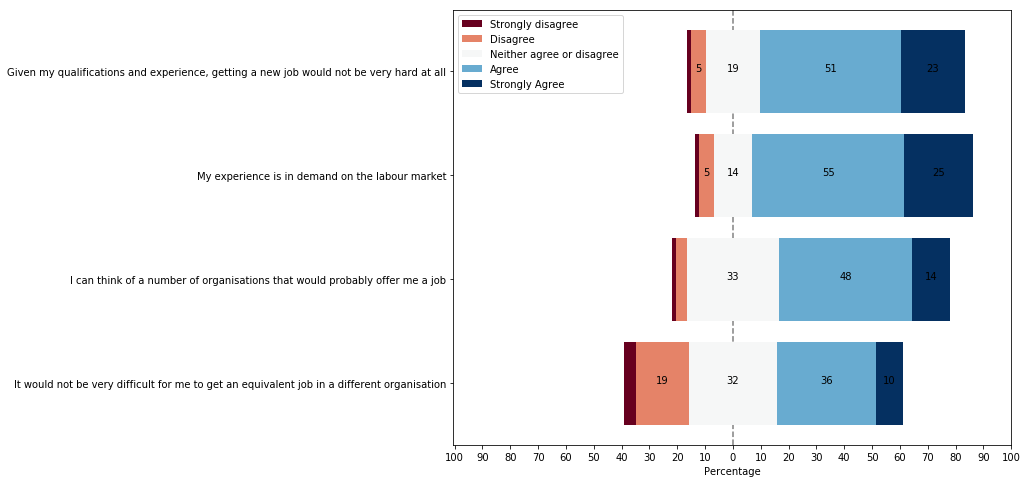

In [134]:
_ = get_plot(v_to_count, "likert")

## Affective recognition

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job

In [135]:
v_to_count, filename  = get_count(df, ["likert4[affRec1]. [I am satisfied with my supervisor/line manager's confidence in me]", 'likert4[affRec3]. [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [136]:
display(v_to_count) 

,I am satisfied with my supervisor/line manager's confidence in me,I am satisfied with the recognition I receive from my supervisor/line manager for doing my job
Strongly disagree,4,6
Disagree,3,5
Neither agree or disagree,10,13
Agree,40,37
Strongly Agree,16,12


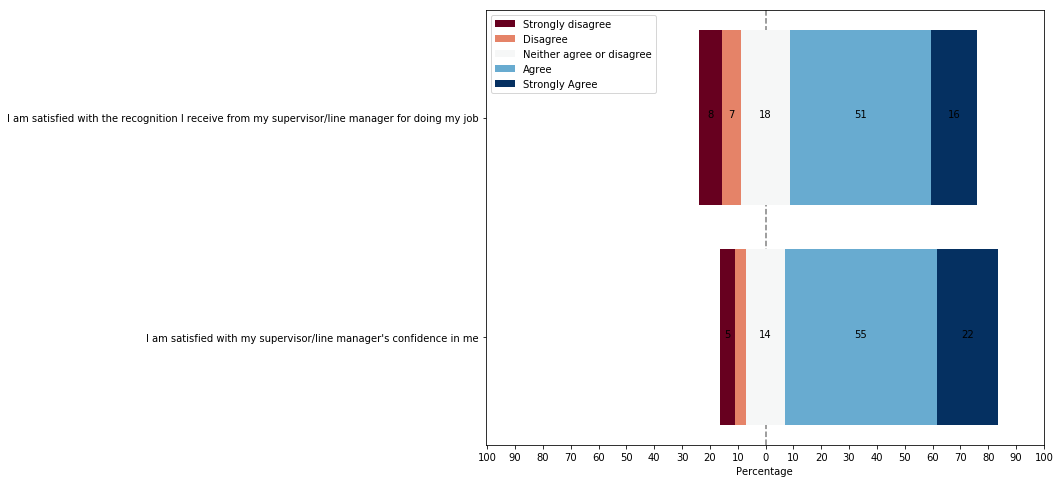

In [137]:
_ = get_plot(v_to_count, "likert")

## Affective satisfaction

### I find real enjoyment in my job; Most days I am enthusiastic about my job

In [138]:
v_to_count, filename  = get_count(df, ['likert4[affSat1]. [I find real enjoyment in my job]', 'likert4[affSat2]. [Most days I am enthusiastic about my job]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [139]:
display(v_to_count) 

,I find real enjoyment in my job,Most days I am enthusiastic about my job
Strongly disagree,2,3
Disagree,1,3
Neither agree or disagree,6,4
Agree,45,47
Strongly Agree,19,16


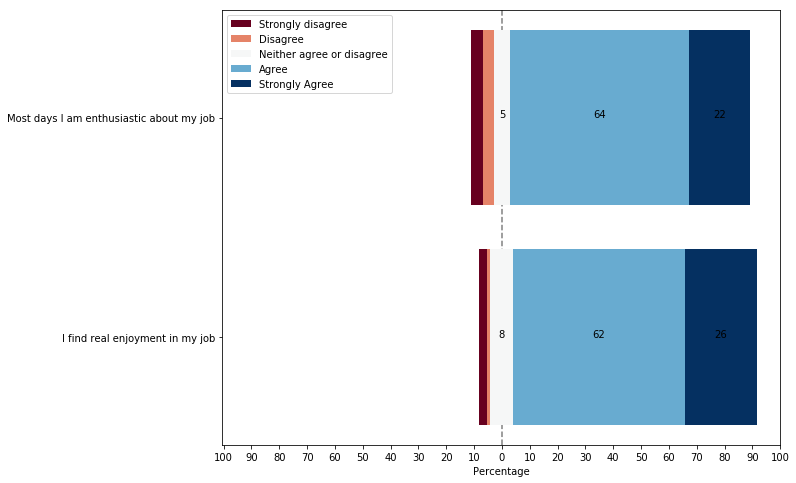

In [140]:
_ = get_plot(v_to_count, "likert")

## Possibility of progression

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan; My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [141]:
v_to_count, filename  = get_count(df, ['likert2[progRSE1]. [It is likely that I will gain a promotion within my current group]', 'likert2[progRSE2]. [The process I have to complete to gain a promotion is clear and understandable]', 'likert2[progRSE3]. [There are many opportunities within my chosen career plan]', 'likert2[progRSE4]. [My current position is an integral part of my career plan]', 'likert2[progRSE5]. [It is likely that my next position will be an RSE role]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [142]:
display(v_to_count) 

,It is likely that I will gain a promotion within my current group,The process I have to complete to gain a promotion is clear and understandable,There are many opportunities within my chosen career plan,My current position is an integral part of my career plan,It is likely that my next position will be an RSE role
Strongly disagree,11,13,6,2,4
Disagree,16,30,17,9,11
Neither agree or disagree,33,18,23,13,36
Agree,11,10,22,31,17
Strongly Agree,2,2,5,18,4


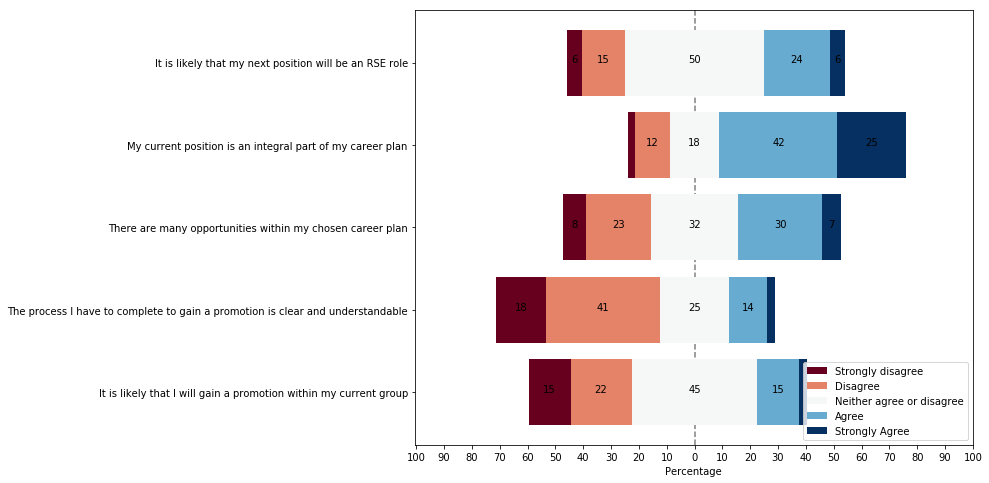

In [143]:
_ = get_plot(v_to_count, "likert")

# Section 9. Research Software Engineer

## RSE Network

### How do you meet other RSEs?

In [144]:
v_to_count, filename  = get_count(df, ['ukrse2[1]. How do you meet other RSEs? [UK RSE Association / Conference]', 'ukrse2[2]. How do you meet other RSEs? [NL-RSE Association]', 'ukrse2[3]. How do you meet other RSEs? [Local group/network]', 'ukrse2[4]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../survey_creation/2017/nl/listAnswers/ukrse_nl.csv", "False", "./2017/nl/output/")

In [145]:
perc_to_count = get_percentage(v_to_count, filename)

In [146]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
,,
Local group/network,42,56.0
N/A,26,35.0
NL-RSE Association,4,5.0
UK RSE Association / Conference,3,4.0


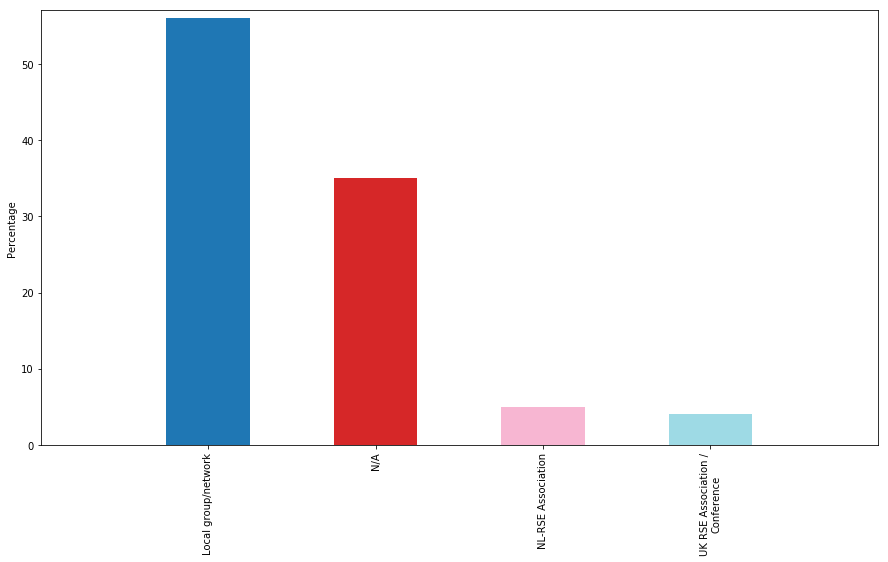

In [147]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list)

In [148]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list)'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [149]:
perc_to_count = get_percentage(v_to_count, filename)

In [150]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list),28,32,17,47.0,53.0


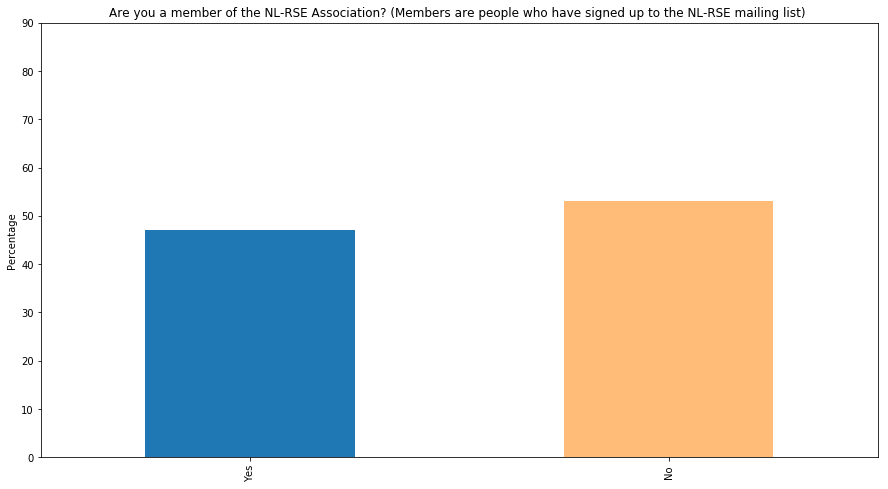

In [151]:
_ = get_plot(perc_to_count, "y/n/na")